In [11]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import cv2
from pylab import *

#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
%matplotlib inline
from PIL import Image

from pylab import rcParams
rcParams['figure.figsize'] = 6, 6

In [13]:
imgX = Image.open("MArylin.JPG")  # open colour image
imgX = imgX.convert('L')
img = np.asarray(imgX)
img = 2*(img > 128).astype(int)-1

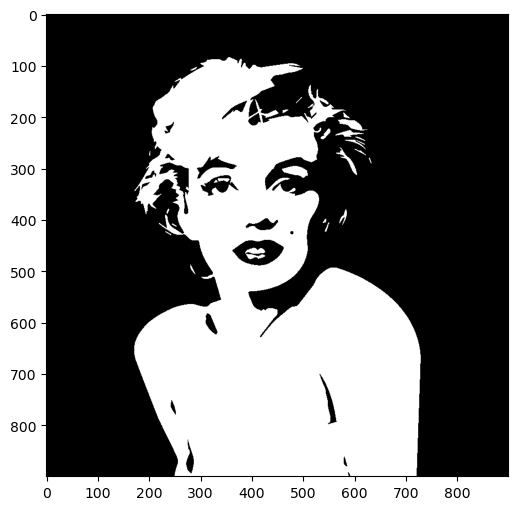

In [14]:
plt.imshow(img,cmap='gray',vmin=-1,vmax=1)
plt.show()

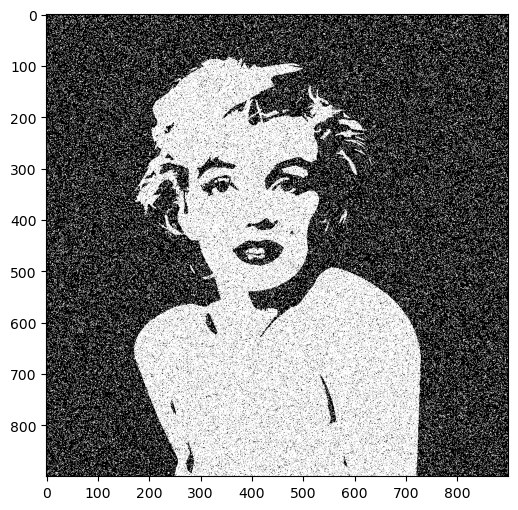

In [27]:
#create a noisy binary image
noise = np.random.random(img.shape)
noise = where(noise<0.15,-1,1)
Y = np.array(img*noise) #observed noisy binary image.

height,width = Y.shape
N = height*width

imgplot = plt.imshow(Y, cmap = cm.Greys_r)
plt.show()

In [16]:
sigma_squared = 1
N = height*width

beta = 0.8 # for arbitrary parameters that reflects our prior belief

T = 6000000 # sufficient number of steps to converge stationary distribution
errorG= np.zeros(T)

X = Y.copy() # Initialize Z from X
for t in range(T):

    if(t%100000==0):
      np.save('arrayG.npy',errorG)
      np.save('ImageG.npy', X)
      np.save('iteration',t)

    i,j = np.random.choice(height), np.random.choice(width) # randomly choose a coordinate (i,j)


    # Calculate acceptance propability
    # We don't take exponential. Instead, we take the log of random number. This is more stable.
    energy =  beta*(np.sum(X[max(i-1,0):i+2,max(j-1,0):j+2]) - X[i,j])
    term1=np.exp(energy -(0.5/sigma_squared)*(Y[i,j]-1)**2)
    term2=np.exp(-energy - (0.5/sigma_squared)*(Y[i,j]+1)**2)
    Prob_Xij_one_given_neighbors = float(term1)/(term1+term2)
    Prob_Xij_minus_one_given_neighbors = 1.0 - Prob_Xij_one_given_neighbors #float(term2)/(term1+term2)

    # We also don't deal with minimum function for acceptance probability
    #   because we don't need to cast it to 1 if it is higher.

    # Flip the pixel if accepted

    X[i,j]=-1 if np.random.rand()<=Prob_Xij_minus_one_given_neighbors else 1

    errorG[t]=np.sum(img != X)

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(img,cmap='gray',vmin=-1,vmax=1)
ax[0].set_title("Original", fontsize=16)
ax[1].imshow(Y,cmap='gray',vmin=-1,vmax=1)
ax[1].set_title("Noisy", fontsize=16)
ax[2].imshow(X,cmap='gray',vmin=-1,vmax=1)
ax[2].set_title("Denoised", fontsize=16)
plt.show()

In [ ]:
np.save('arrayG.npy',errorG)
np.save('ImageG.npy', X)

In [ ]:
x = np.linspace(0, T, T)
# Plot the array against x
plt.plot(x, (errorG*100/(width*height)))
plt.xlabel('Iteration #')
plt.ylabel('Error %')
plt.title('Evolution of Gibbs %error w.r.t the number of iterations')
plt.grid(True)
plt.show()

Timing the function

In [ ]:
import timeit
import matplotlib.pyplot as plt

T=6000000

beta=0.8
sigma_squared=1
X = Y.copy() # Initialize Z from X

def my_function():
    i,j = np.random.choice(height), np.random.choice(width) # randomly choose a coordinate (i,j)


    # Calculate acceptance propability
    # We don't take exponential. Instead, we take the log of random number. This is more stable.
    energy =  beta*(np.sum(X[max(i-1,0):i+2,max(j-1,0):j+2]) - X[i,j])
    term1=np.exp(energy -(0.5/sigma_squared)*(Y[i,j]-1)**2)
    term2=np.exp(-energy - (0.5/sigma_squared)*(Y[i,j]+1)**2)
    Prob_Xij_one_given_neighbors = float(term1)/(term1+term2)
    Prob_Xij_minus_one_given_neighbors = 1.0 - Prob_Xij_one_given_neighbors #float(term2)/(term1+term2)

    # We also don't deal with minimum function for acceptance probability
    #   because we don't need to cast it to 1 if it is higher.

    # Flip the pixel if accepted

    X[i,j]=-1 if np.random.rand()<=Prob_Xij_minus_one_given_neighbors else 1


execution_time = [0] * (T + 1)  # Initialize the list of execution times

# Calculate execution times for the first iteration
execution_time[1] = timeit.timeit(my_function, number=1)

for i in range(2, T + 1):
    execution_time[i] = execution_time[1] * i

iterations = range(1, T + 1)  # Number of iterations



plt.plot(iterations, execution_time[1:])
plt.xlabel('Number of Iterations')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. Number of Iterations')
plt.show()

In [ ]:
np.save('arrayG.npy',errorG)
np.save('ImageG.npy', X)

In [ ]:
errorG[5999999]*100/N

In [ ]:
min(errorG)*100/N

alla fine ci ha messo meno di metropolis, non ho idea del perchè